# Rental Inventory Analysis

## Introduction

My analysis is focused on the rental properties located in Manhattan, New York. With Manhattan being the most popular borough in New York City, it was appropriate to use its data as a way to analyze the rental inventory trends from before, during (03/2020 - 12/2020), and after the COVID-19 pandemic. In analyzing the rental inventory in the city, I sought to answer questions regarding the effect of the pandemic on inventory:

- Which neighborhoods, generally, see the most rental properties available?
- How did COVID affect available rental properties in Manhattan's neighborhoods?
- What trends were found in Manhattan's submarkets, and how did the pandemic affect these trends by quarter?

### StreetEasy Dataset (https://streeteasy.com/blog/data-dashboard/[object%20Object])

For this notebook, I looked at the inventory of rental units in Manhattan from the years 2018 to 2022. The data was courtesy of StreetEasy, a website for housing and properties in New York City. It is known to be a reliable source for New Yorkers to find available housing, so they have access to data regarding the housing and rental market in New York City. In addition, their data is generally granular, with inventory statistics available by month, and by neighborhood or submarket, since 2010, and updated constantly. This allowed for my analysis to be reliable and allowed for trends to appear more meaningfully. The rental inventory is collected based on the number of rental listings available at any time during each month.


### Maptiler API (https://docs.maptiler.com/cloud/api)

To represent each neighborhood's average inventory from 2018 to 2022 visually, I leveraged Maptiler's API reference to their Cloud Services to retrieve the latitudes and longitudes of each neighborhood in Manhattan. This free service allowed me to search for locations by name, so I was able to retrieve most of the neighborhoods' coordinates (while hard-coding the handful that were not found). With this, I was able to plot them onto a map of Manhattan, allowing for an interactive and engaging visualization of rental inventory in the city.


In [9]:
# Import dependencies
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import hvplot.pandas

# Import API key
from config import maptiler_apikey

In [10]:
# Create a function to clean the CSV file for Manhattan and desired date range
def clean_dataframe(df):

    # Use the melt function to unpivot the DataFrame and create a single column for dates
    clean_df = df.melt(id_vars=['areaName', 'Borough', 'areaType'], var_name='Date', value_name='Inventory')
    
    # Narrow the DataFrame to Manhattan
    clean_manhattan_df = clean_df[(clean_df['Borough'] == 'Manhattan')]

    # Loop through the DataFrame to search for desired date range and append to empty list
    row_range = []
    for index, row in clean_manhattan_df.iterrows():
        if row['Date'][:4] == '2018' or row['Date'][:4] == '2019' or row['Date'][:4] == '2020' or row['Date'][:4] == '2021' or row['Date'][:4] == '2022':
            row_range.append(row)

    # Create DataFrame from list
    final_df = pd.DataFrame(row_range).reset_index(drop=True)

    # Convert 'Date' column to datetime format
    final_df['Date'] = pd.to_datetime(final_df['Date'])
    
    return final_df

In [11]:
# Import CSV for rental inventory in NYC and create a DataFrame
csvpath_rent = "../Resources/rentalInventory_All.csv"
rental_inventory_df = pd.read_csv(csvpath_rent)

# Use the function to narrow the DataFrame for the desired location and dates
rent_manhattan_inv = clean_dataframe(rental_inventory_df)

# Keep only the 'neighborhood' areaType
rent_manhattan_inv = rent_manhattan_inv[rent_manhattan_inv['areaType'] == 'neighborhood'].reset_index(drop=True)

# Display new DataFrame
rent_manhattan_inv.head()

,areaName,Borough,areaType,Date,Inventory
0,Battery Park City,Manhattan,neighborhood,2018-01-01,209
1,Central Harlem,Manhattan,neighborhood,2018-01-01,657
2,Central Park South,Manhattan,neighborhood,2018-01-01,75
3,Chelsea,Manhattan,neighborhood,2018-01-01,895
4,Chinatown,Manhattan,neighborhood,2018-01-01,62


# Plotting Average Rent Inventory by Neighborhood

In [12]:
neighborhoods = rent_manhattan_inv['areaName'].unique()
found_lat_long = {}
lat_long_notfound = []

for neighborhood in neighborhoods:

    # Done to remove '/' from 'Stuyvesant Town/PCV'
    if '/' in neighborhood:
        neighborhood = neighborhood.replace('/', ' ')

    # Initialize neighborhood for API search
    query = f'{neighborhood}, Manhattan'
    
    # Set base URL
    base_url = f"https://api.maptiler.com/geocoding/{query}.json?key={maptiler_apikey}"

    # Make a GET request and change it to JSON
    name_address = requests.get(base_url).json()

    try:
        # Check if the location found by the GET request is for Manhattan
        if (', '.join(name_address['features'][0]['place_name'].split(', ')[0:2])) == query:

            # Extract the coordinates and assign to the dictionary
            found_lat_long[neighborhood] = name_address['features'][0]['geometry']['coordinates']
            print(f"{query} was found!")
        else:
            # Assign query name to a list of neighborhoods not found
            print(f"{query} did not match")
            lat_long_notfound.append(query)
    except:
        print(f"{query} was not found")
        lat_long_notfound.append(query)
        pass

found_lat_long


Battery Park City, Manhattan was found!
Central Harlem, Manhattan did not match
Central Park South, Manhattan did not match
Chelsea, Manhattan was found!
Chinatown, Manhattan was found!
Civic Center, Manhattan was found!
East Harlem, Manhattan was found!
East Village, Manhattan was found!
Financial District, Manhattan was found!
Flatiron, Manhattan did not match
Gramercy Park, Manhattan was found!
Greenwich Village, Manhattan was found!
Hamilton Heights, Manhattan was found!
Inwood, Manhattan was found!
Little Italy, Manhattan was found!
Lower East Side, Manhattan was found!
Marble Hill, Manhattan was found!
Midtown, Manhattan was found!
Midtown East, Manhattan was found!
Midtown South, Manhattan was found!
Midtown West, Manhattan did not match
Morningside Heights, Manhattan was found!
Nolita, Manhattan did not match
Roosevelt Island, Manhattan was found!
Soho, Manhattan did not match
Stuyvesant Town PCV, Manhattan did not match
Tribeca, Manhattan was found!
Upper East Side, Manhattan 

{'Battery Park City': [-74.0169370919466, 40.71101673544539],
 'Chelsea': [-74.0015284717083, 40.746490628528385],
 'Chinatown': [-73.99625055491924, 40.716491497942705],
 'Civic Center': [-74.00240421295166, 40.71367933109386],
 'East Harlem': [-73.94250009208918, 40.79472223506761],
 'East Village': [-73.98736137896776, 40.729269020403876],
 'Financial District': [-74.00927100330591, 40.70766832644719],
 'Gramercy Park': [-73.98676768876612, 40.7379753607984],
 'Greenwich Village': [-73.99656604975462, 40.7319804282054],
 'Hamilton Heights': [-73.95006190985441, 40.82414516746835],
 'Inwood': [-73.92049491405487, 40.86925797610624],
 'Little Italy': [-73.99821527302265, 40.71927305271932],
 'Lower East Side': [-73.98680582642555, 40.71593573211237],
 'Marble Hill': [-73.91042925417423, 40.87629833454393],
 'Midtown': [-73.98478008806705, 40.755116903906696],
 'Midtown East': [-73.97247109562159, 40.75982211197815],
 'Midtown South': [-73.98425102233887, 40.74984191057065],
 'Mornings

In [13]:
# Create a DataFrame from the resulting dictionary, with the neighborhoods as the index
manhattan_lat_long = pd.DataFrame(found_lat_long).T

# Rename columns
manhattan_lat_long.columns = ['Longitude', 'Latitude']


In [ ]:
# Hard-code the missing latitudes and longitudes and add them to the DataFrame
manhattan_lat_long.loc['Central Harlem', 'Longitude'] = -73.9423528972
manhattan_lat_long.loc['Central Harlem', 'Latitude'] = 40.8054167783

manhattan_lat_long.loc['Central Park South', 'Longitude'] = -73.977668970226
manhattan_lat_long.loc['Central Park South', 'Latitude'] = 40.76635058859312

manhattan_lat_long.loc['Flatiron', 'Longitude'] = -73.987162718
manhattan_lat_long.loc['Flatiron', 'Latitude'] = 40.737997048

manhattan_lat_long.loc['Midtown West', 'Longitude'] = -73.994508
manhattan_lat_long.loc['Midtown West', 'Latitude'] = 40.763186

manhattan_lat_long.loc['Nolita', 'Longitude'] = -73.9951515
manhattan_lat_long.loc['Nolita', 'Latitude'] = 40.722542

manhattan_lat_long.loc['Soho', 'Longitude'] = -74.0
manhattan_lat_long.loc['Soho', 'Latitude'] = 40.721497114

manhattan_lat_long.loc['Stuyvesant Town/PCV', 'Longitude'] = -73.97332944
manhattan_lat_long.loc['Stuyvesant Town/PCV', 'Latitude'] = 40.725663764

manhattan_lat_long.loc['West Harlem', 'Longitude'] = -73.962898
manhattan_lat_long.loc['West Harlem', 'Latitude'] = 40.816357


In [15]:
# Group DataFrame by neighborhood for merging
grouped_inv = rent_manhattan_inv.groupby(['areaName']).mean('inventory').round()

# Merge lat/longs to the DataFrame
merged_lat_long = pd.merge(grouped_inv, manhattan_lat_long, right_index=True, left_index=True, how='outer')

# Reset the index and rename the column
neighborhood_lat_longs = merged_lat_long.reset_index(drop=False)
neighborhood_lat_longs = neighborhood_lat_longs.rename(columns={'index': 'Neighborhoods'})

# Display new DataFrame
neighborhood_lat_longs

,Neighborhoods,Inventory,Longitude,Latitude
0,Battery Park City,222.0,-74.016937,40.711017
1,Central Harlem,953.0,-73.942353,40.805417
2,Central Park South,82.0,-73.977669,40.766351
3,Chelsea,963.0,-74.001528,40.746491
4,Chinatown,87.0,-73.996251,40.716491
5,Civic Center,1.0,-74.002404,40.713679
6,East Harlem,469.0,-73.942500,40.794722
7,East Village,1314.0,-73.987361,40.729269
8,Financial District,810.0,-74.009271,40.707668
9,Flatiron,477.0,-73.987163,40.737997


In [16]:
manhattan_map_plot = neighborhood_lat_longs.hvplot.points(
    'Longitude',
    'Latitude',
    geo=True,
    tiles="OSM",
    title="Manhattan Neighborhood Rentals",
    color='Neighborhoods',
    alpha = 0.75,
    s='Inventory',
    scale=1,
    frame_width=800,
    frame_height=800
)

manhattan_map_plot

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (Neighborhoods,Inventory)

## Analysis and Conclusions

Looking at the map of the neighborhoods' average inventory, we can see that there is a large number of rental units in the Upper East Side and Upper West Side, as well as Midtown Manhattan. The Upper East Side had an average of about 3,184 rental units in inventory between 2018 and 2022, while the Upper West Side had an average of about 2,753 units in inventory. This would generally suggest a higher demand for rental units in these areas of central Manhattan. In addition, there is a notably large number of neighborhoods in downtown Manhattan, making this submarket another popular area for people to rent.

# Average Rental Inventory Before, During, and After COVID

In [17]:
pre_covid_rent_inv = rent_manhattan_inv[rent_manhattan_inv['Date'].between("2018-01-01", "2020-02-01")]
pre_covid_rent_inv

,areaName,Borough,areaType,Date,Inventory
0,Battery Park City,Manhattan,neighborhood,2018-01-01,209
1,Central Harlem,Manhattan,neighborhood,2018-01-01,657
2,Central Park South,Manhattan,neighborhood,2018-01-01,75
3,Chelsea,Manhattan,neighborhood,2018-01-01,895
4,Chinatown,Manhattan,neighborhood,2018-01-01,62
...,...,...,...,...,...
827,Upper East Side,Manhattan,neighborhood,2020-02-01,1911
828,Upper West Side,Manhattan,neighborhood,2020-02-01,1878
829,Washington Heights,Manhattan,neighborhood,2020-02-01,435
830,West Harlem,Manhattan,neighborhood,2020-02-01,55


In [18]:
covid_rent_inv = rent_manhattan_inv[rent_manhattan_inv['Date'].between("2020-03-01", "2020-12-01")]
covid_rent_inv

,areaName,Borough,areaType,Date,Inventory
832,Battery Park City,Manhattan,neighborhood,2020-03-01,155
833,Central Harlem,Manhattan,neighborhood,2020-03-01,599
834,Central Park South,Manhattan,neighborhood,2020-03-01,81
835,Chelsea,Manhattan,neighborhood,2020-03-01,691
836,Chinatown,Manhattan,neighborhood,2020-03-01,59
...,...,...,...,...,...
1147,Upper East Side,Manhattan,neighborhood,2020-12-01,5380
1148,Upper West Side,Manhattan,neighborhood,2020-12-01,4652
1149,Washington Heights,Manhattan,neighborhood,2020-12-01,975
1150,West Harlem,Manhattan,neighborhood,2020-12-01,121


In [19]:
post_covid_rent_inv = rent_manhattan_inv[rent_manhattan_inv['Date'].between("2021-01-01", "2022-12-01")]
post_covid_rent_inv

,areaName,Borough,areaType,Date,Inventory
1152,Battery Park City,Manhattan,neighborhood,2021-01-01,376
1153,Central Harlem,Manhattan,neighborhood,2021-01-01,1448
1154,Central Park South,Manhattan,neighborhood,2021-01-01,124
1155,Chelsea,Manhattan,neighborhood,2021-01-01,1651
1156,Chinatown,Manhattan,neighborhood,2021-01-01,141
...,...,...,...,...,...
1915,Upper East Side,Manhattan,neighborhood,2022-12-01,1926
1916,Upper West Side,Manhattan,neighborhood,2022-12-01,1638
1917,Washington Heights,Manhattan,neighborhood,2022-12-01,449
1918,West Harlem,Manhattan,neighborhood,2022-12-01,61


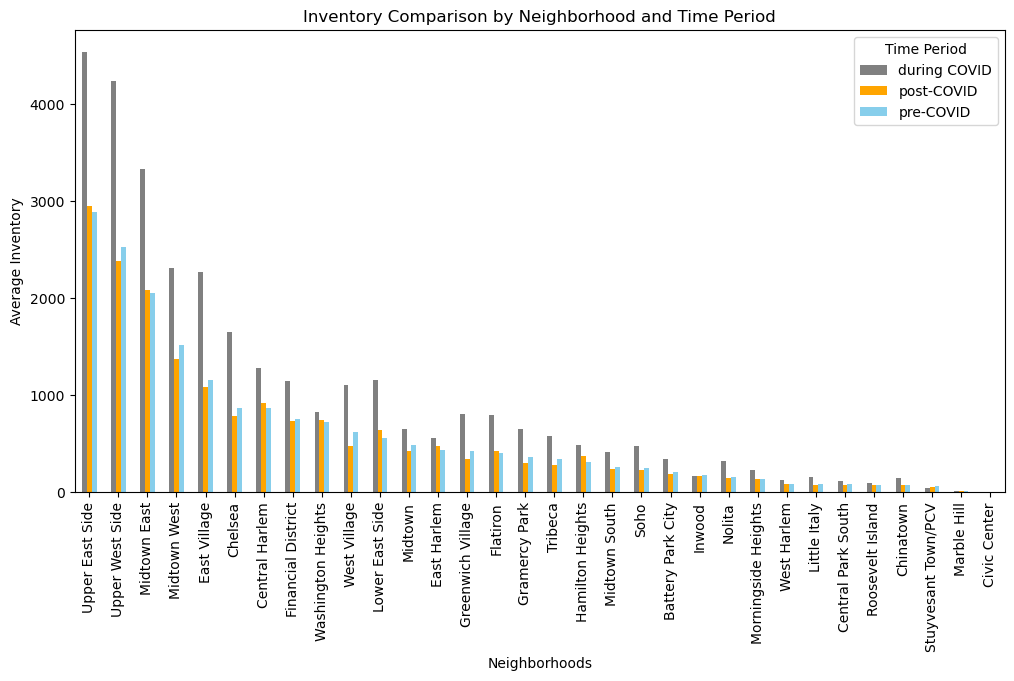

In [20]:
# Group each DataFrame by neighborhood and average the inventory
grouped_precovid = pre_covid_rent_inv.groupby(['areaName']).mean('Inventory').sort_values('Inventory').reset_index()
grouped_precovid['period'] = 'pre-COVID'
grouped_covid = covid_rent_inv.groupby(['areaName']).mean('Inventory').sort_values('Inventory').reset_index()
grouped_covid['period'] = 'during COVID'
grouped_postcovid = post_covid_rent_inv.groupby(['areaName']).mean('Inventory').sort_values('Inventory').reset_index()
grouped_postcovid['period'] = 'post-COVID'
grouped = pd.concat([grouped_precovid, grouped_covid, grouped_postcovid]).reset_index()

# Create a pivot DataFrame to plot pre-, during, and post-covid using 'period' as column sets
pivot_df = grouped.pivot(index='areaName', columns='period', values='Inventory').sort_values('pre-COVID', ascending=False)

# Plotting
pivot_df.plot(kind='bar', color=['grey', 'orange', 'skyblue'], figsize=(12, 6))
plt.title('Inventory Comparison by Neighborhood and Time Period')
plt.xlabel('Neighborhoods')
plt.ylabel('Average Inventory')
plt.xticks(rotation='vertical')
plt.legend(title='Time Period')

# Display the plot
plt.show()

## Analysis and Conclusion

This bar graph demonstrates the average inventory of each neighborhood from pre-COVID, during COVID, and post-COVID. As discussed prior, the areas with the most rental inventory include the Upper East Side and Upper West Side, Midtown, and neighborhoods in Downtown Manhattan. Prior to the pandemic, we can see that the average inventory for many of the neighborhoods was slightly greater than their inventory post-COVID, with a few exceptions. However, the most notable trend is how much more inventory was found during March to December of 2020, the beginning of the pandemic. We can see that pre-COVID, the Upper East Side's average rental inventory was 2,885 units, and that number jumped to 4,533 units during the start of COVID. We can see that, due to the pandemic, much fewer people began to rent units in Manhattan. This would then lead to a massive jump in inventory as shown for almost every neighborhood in the dataset. With fewer people wanting to move into the congested areas of manhattan, it is expected that rental units would be more prolific as a result.

Moving forward, another interesting trend is the average rental units during COVID and post-COVID, from 2021 to 2022. Again, in the Upper East Side, the average inventory post-COVID was about 2,885 units, a large drop from the 4,533 during COVID. A drop is found in most other neighborhoods, including the Upper West Side, parts of Midtown, and Chelsea. Furthermore, while it appears the average units post-COVID are generally at the same level as the average units pre-COVID, there is a notable discrepancy between the two time periods. We will explore this more in the next section.


# Trends by Manhattan Submarket Before, During, and After Covid

In [21]:
# Use the function to get a new DataFrame
manhattan_submarkets = clean_dataframe(rental_inventory_df)

# Keep only the 'submarket' areaType
manhattan_submarkets = manhattan_submarkets[manhattan_submarkets['areaType'] == 'submarket'].reset_index(drop=True)

# Add columns for year, quarter, and a combined year_quarter
manhattan_submarkets['Year'] = manhattan_submarkets['Date'].dt.year
manhattan_submarkets['Quarter'] = manhattan_submarkets['Date'].dt.quarter
manhattan_submarkets['Year_Quarter'] = manhattan_submarkets['Year'].astype(str) + ' Q' + manhattan_submarkets['Quarter'].astype(str)


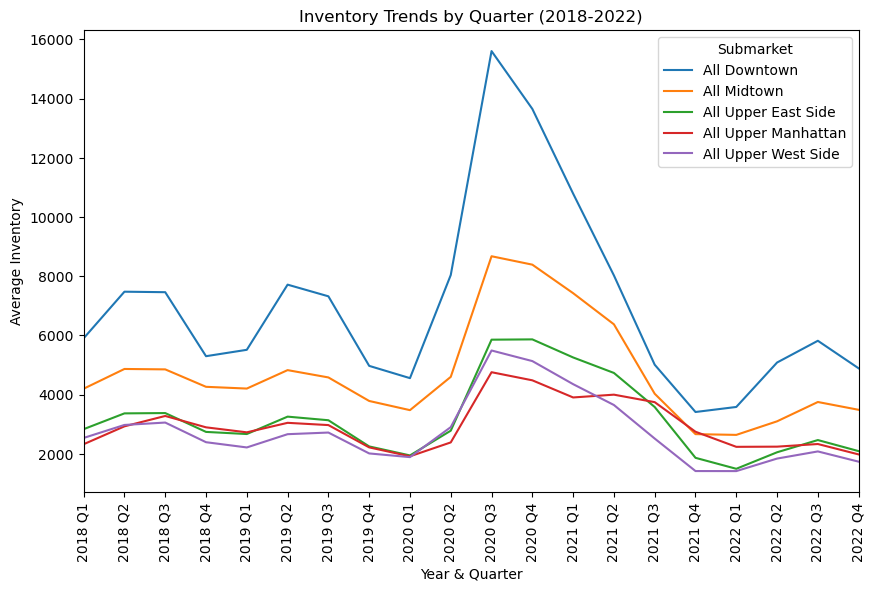

In [24]:
# Group the DataFrame by quarter and get the average inventory
sub_group = manhattan_submarkets.groupby(['Year_Quarter', 'areaName'], as_index=True).mean('Inventory').reset_index()
sub_pivot = sub_group.pivot(index='Year_Quarter', columns='areaName', values='Inventory')

# Set x-axis ticks
x_axis = [i for i in range(len(sub_pivot.index))]

# Plotting data
sub_pivot.plot(figsize=(10, 6))

plt.ylabel('Average Inventory')
plt.xlabel('Year & Quarter')
plt.xticks(x_axis, man_sub_pivot.index, rotation='vertical')
plt.xlim(0, 19)
plt.legend(title='Submarket', loc='upper right')
plt.title('Inventory Trends by Quarter (2018-2022)')

# Display data
plt.show()

## Analysis and Conclusion

Analyzing the average inventory by quarter, we can see many trends. Taking a look at each submarket, we see that Downtown Manhattan has the highest average inventory of all submarkets in the borough. Downtown Manhattan has the most neighborhoods, which would likely explain the average inventory being greater than the others. While the Upper East Side was among the largest neighborhoods in average inventory, it sits below all of Midtown and all Downtown neighborhoods. Meanwhile, all Upper Manhattan is among the lowest in average inventory, which coincides with an earlier trend discussed that areas near central Manhattan (such as Midtown) see more inventory due to a greater demand for people to rent there.

Upon analyzing the trends over each quarter, we can see that between Q4 and Q1 there is a dip in inventory, especially prior to the pandemic. This is likely due to people who moved into these rental units in previous quarters, leading to fewer rental units available as they are occupied. This is further backed by the peaks found in Q2 and Q3, as people look to renew their lease or find another available rental unit. This trend happens in all submarkets, most notably in Downtown Manhattan where the average rental inventory for Q4 2018 was about 5,300, while Q2 2019 saw that number increase to about 7,322.

Moving forward, the average inventory during the pandemic had a notably large spike, particularly in Q3 of 2020. We can see that, from Q1 of 2020, the average inventory for each submarket was trending upward and peaked in Q3, before beginning to fall in Q4 and into 2021. As discussed previously, the pandemic led to many people not wanting to rent in Manhattan. Seeing as how Q2 and Q3 were typically months where inventory would be highest, the inventory grew much bigger as people decided not to renew their lease and/or move elsewhere. In Downtown Manhattan, the average rental inventory was about 15,603 units in Q3 of 2020, over three times as many as there was in Q1 of 2020 (4,559 units).

In the years since COVID, the average inventory began to fall. For all of 2021, most of the submarkets (except for Upper Manhattan) continuously dropped in rental units available, before beginning to rise again in Q2 and Q3 of 2022. Q4 of 2021 saw the lowest drop of the dataset for many of the submarkets; Downtown Manhattan had an average inventory of about 3,416 units. However, the peak inventory averages of 2022 was notably less than the peaks found in 2018 and 2019, before COVID. For example, in Downtown Manhattan, a Q2 2022 average of 5,087 units or a Q3 average of 5,821 units is much less than the 7,716 average units seen in Q2 2019. The overall decrease in available inventory in the years since COVID suggest people either renewing their leases more often (meaning their unit would not be put on the market), or just a general decline in available rental units.
